In [9]:
# Импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
sns.set_style("whitegrid")

%matplotlib inline

SEED = 42

import sklearn

from IPython.display import display, Markdown

import sys
import os
from pathlib import Path

# Определяем путь к директории ноутбука
# Простое решение: определяем папку, где находится файл ноутбука
notebook_dir = None

# Способ 1: Используем библиотеку ipynbname (самый надежный способ)
# Если библиотека не установлена, она будет установлена автоматически
try:
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except ImportError:
    # Устанавливаем библиотеку, если её нет
    import subprocess
    import sys
    print("📦 Устанавливаю библиотеку ipynbname для определения пути к ноутбуку...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ipynbname", "-q"])
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except Exception as e:
    print(f"⚠️  Не удалось использовать ipynbname: {e}")

# Способ 2: Пробуем получить путь через IPython (запасной вариант)
if notebook_dir is None:
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            if hasattr(ipython, 'start_dir'):
                notebook_dir = str(Path(ipython.start_dir).resolve())
    except:
        pass

# Способ 3: Если не удалось определить, выводим ошибку
if notebook_dir is None:
    print(f"❌ ОШИБКА: Не удалось определить папку ноутбука!")
    print(f"   Текущая рабочая директория: {os.getcwd()}")
    print(f"   Установите библиотеку: pip install ipynbname")
    raise RuntimeError("Не удалось определить директорию ноутбука. Установите: pip install ipynbname")

# Выводим информацию для диагностики
print(f"📂 Директория ноутбука: {notebook_dir}")
print(f"📂 Текущая рабочая директория (до chdir): {os.getcwd()}")

# Добавляем путь к директории ноутбука в sys.path (в начало для приоритета)
if notebook_dir not in sys.path:
    sys.path.insert(0, notebook_dir)

# Меняем рабочую директорию на директорию ноутбука, чтобы относительные пути работали
os.chdir(notebook_dir)
print(f"📂 Рабочая директория установлена: {os.getcwd()}")


from tqdm import tqdm
import time

# print(f'Numpy version {np.__version__}')
# print(f'Pandas version {pd.__version__}')
# print(f'sklearn version {sklearn.__version__}')
# print(f'scipy version {scipy.__version__}')
# print(f'sympy version {sympy.__version__}')


from sklearnex import patch_sklearn, config_context
patch_sklearn()



17:20:07 | DEBUG    | logging:callHandlers - Loaded backend inline version unknown.


📂 Директория ноутбука: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 7\DIS-MATH-3.2. Графы. Часть 2
📂 Текущая рабочая директория (до chdir): C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 7\DIS-MATH-3.2. Графы. Часть 2
📂 Рабочая директория установлена: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 7\DIS-MATH-3.2. Графы. Часть 2


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [10]:
# настройка логгирования

%pip install loguru

from loguru import logger
from helper.logging_config import setup_logging
import logging

# Вызываем настройку в самом начале работы приложения
setup_logging()

# Уменьшаем уровень логирования для sklearn и sklearnex, чтобы убрать лишние INFO сообщения
logging.getLogger('sklearn').setLevel(logging.WARNING)
logging.getLogger('sklearnex').setLevel(logging.WARNING)
logging.getLogger('sklearn.utils.validation').setLevel(logging.WARNING)
logging.getLogger('sklearn.cluster').setLevel(logging.WARNING)

# Отключаем DEBUG сообщения от matplotlib (особенно от font_manager при поиске шрифтов)
logging.getLogger('matplotlib').setLevel(logging.WARNING)
logging.getLogger('matplotlib.font_manager').setLevel(logging.WARNING)
logging.getLogger('PIL').setLevel(logging.WARNING)

#user_id = 123
#status = "success"
# Привычный и читаемый синтаксис
#logger.info("Аутентификация для пользователя {id} прошла со статусом: {status}", id=user_id, status=status)

# @logger.catch
# def main_logic():
#     logger.info("Приложение начинает работу.")
#     # ... ваш основной код ...
#     a = 10
#     b = 0
#     result = a / b # Это вызовет ошибку, которую поймает @logger.catch

@logger.catch
def main_logic():
    logger.info("Приложение начинает работу.")
    
if __name__ == "__main__":
    main_logic()



17:20:14 | INFO     | helper.logging_config:setup_logging - Стандартный logging перехвачен.
17:20:14 | INFO     | helper.logging_config:setup_logging - Конфигурация логирования завершена.
17:20:14 | INFO     | __main__:main_logic - Приложение начинает работу.


Note: you may need to restart the kernel to use updated packages.


# 3. Расстояния в графе

Представим, что граф G представляет собой карту города с шестью ключевыми точками (вершинами):

A — Железнодорожный вокзал,
B — Университет,
C — Торговый центр,
D — Парк,
E — Больница,
F — Стадион.
Рёбра между этими точками представляют собой дороги, непосредственно их соединяющие.

Пусть у нас граф задан с помощью такой матрицы смежности:

$\begin{equation} \begin{array}{ccccccc} & A & B & C & D & E & F \\ \hline A & 0 & 1 & 0 & 0 & 0 & 0 \\ B & 1 & 0 & 1 & 1 & 0 & 0 \\ C & 0 & 1 & 0 & 0 & 1 & 1 \\ D & 0 & 1 & 0 & 0 & 1 & 0 \\ E & 0 & 0 & 1 & 1 & 0 & 1 \\ F & 0 & 0 & 1 & 0 & 1 & 0 \end{array} \end{equation}$

Мы можем легко получить её с помощью кода на Python:

In [11]:
import networkx as nx
import pandas as pd

K = nx.Graph()
K.add_edges_from([
    ('A', 'B'), 
    ('B', 'C'), 
    ('B', 'D'), 
    ('C', 'E'), 
    ('C', 'F'), 
    ('D', 'E'), 
    ('E', 'F')
])

adjacency_matrix = nx.adjacency_matrix(K)
adjacency_df = pd.DataFrame(adjacency_matrix.toarray(), index=K.nodes(), columns=K.nodes())
adjacency_df

,A,B,C,D,E,F
A,0,1,0,0,0,0
B,1,0,1,1,0,0
C,0,1,0,0,1,1
D,0,1,0,0,1,0
E,0,0,1,1,0,1
F,0,0,1,0,1,0


Степени вершин: {'A': 1, 'B': 3, 'C': 3, 'D': 2, 'E': 3, 'F': 2}
Эксцентриситеты вершин: {'A': 3, 'B': 2, 'C': 2, 'D': 2, 'E': 3, 'F': 3}
Радиус графа: 2
Диаметр графа: 3
Минимальная степень: 1
Максимальная степень: 3


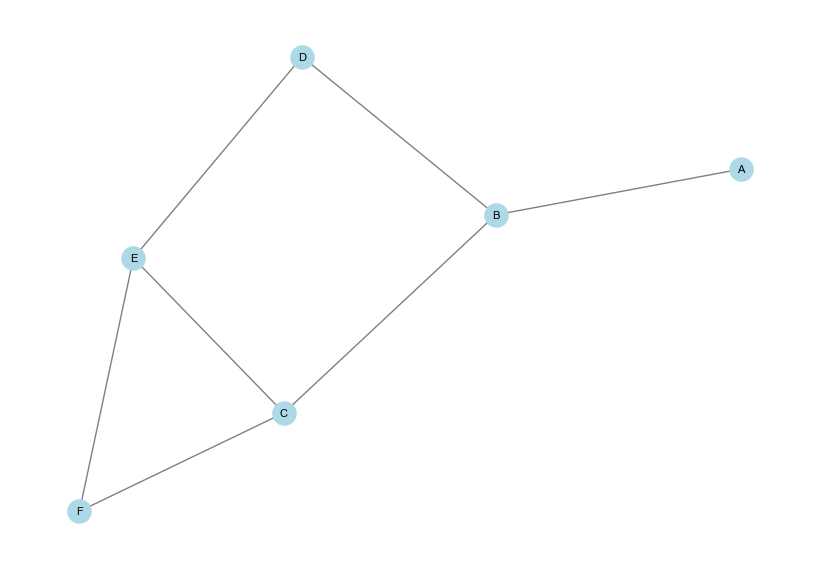

In [15]:
# Вычисляем характеристики структуры графа
degrees = dict(K.degree())
eccentricities = nx.eccentricity(K)
radius = nx.radius(K)
diameter = nx.diameter(K)

# Выводим информацию о структуре графа
print(f"Степени вершин: {degrees}")
print(f"Эксцентриситеты вершин: {eccentricities}")
print(f"Радиус графа: {radius}")
print(f"Диаметр графа: {diameter}")
print(f"Минимальная степень: {min(degrees.values())}")
print(f"Максимальная степень: {max(degrees.values())}")

pos = nx.spring_layout(K, seed=42)

# Отображаем граф
nx.draw(K, pos, with_labels=True,  
        node_color='lightblue', edge_color='gray', font_size=8)
plt.show()

## Реализация алгоритма поиска в ширину с помощью Python

Давайте подробно рассмотрим реализацию алгоритма поиска в ширину для невзвешенного графа, используя Python и словарь множеств в качестве структуры данных для представления графа.

В невзвешенном графе рёбра равнозначны и не имеют связанных с ними весов. Граф может быть представлен в виде списка смежности, где для каждой вершины указан список вершин, с которыми она непосредственно соединена.

В Python граф обычно представляется в виде словаря, где ключами являются вершины, а значениями — списки смежных вершин.

Для начала определим граф в виде словаря множеств, где ключами будут вершины, а значениями — множества вершин, с которыми они прямо соединены:

In [16]:
adj_list = {
    'A': ['C', 'B', 'K'], # A связана с C, B, K
    'C': ['A', 'B', 'D'], # C связана с A, B, D
    'B': ['A', 'C', 'K'], # B связана с A, C, K
    'K': ['A', 'B', 'F'], # K связана с A, B, F
    'F': ['K', 'D'],      # F связана с K, D
    'D': ['C', 'F']       # D связана с C, F
}

Далее мы инициализируем основные структуры данных, используемые в алгоритме: множество для отслеживания посещённых вершин, очередь для хранения вершин, которые предстоит посетить, а также словари для хранения уровней каждой вершины и родителей для возможности восстановления пути.

In [17]:
from collections import deque

def bfs(graph, start_vertex):
    visited = set()  # Посещённые вершины
    queue = deque([start_vertex])  # Очередь для BFS
    levels = {start_vertex: 0}  # Уровни вершин относительно стартовой
    parents = {start_vertex: None}  # Родители вершин в дереве BFS

Затем мы начинаем обходить граф, используя BFS. Цель обхода — посетить все вершины графа, доступные из начальной точки, сохраняя при этом информацию, как далеко каждая вершина находится от начальной, и как мы дошли до каждой вершины.

Мы начинаем с извлечения вершины из начала очереди. Эта вершина становится текущей вершиной, которую мы обрабатываем. В начале алгоритма это будет стартовая вершина.

In [20]:
from collections import deque

adj_list = {
    'A': ['C', 'B', 'K'], # A связана с C, B, K
    'C': ['A', 'B', 'D'], # C связана с A, B, D
    'B': ['A', 'C', 'K'], # B связана с A, C, K
    'K': ['A', 'B', 'F'], # K связана с A, B, F
    'F': ['K', 'D'],      # F связана с K, D
    'D': ['C', 'F']       # D связана с C, F
}

def bfs(graph, start_vertex):
    visited = set()  # Посещённые вершины
    queue = deque([start_vertex])  # Очередь для BFS
    levels = {start_vertex: 0}  # Уровни вершин относительно стартовой
    parents = {start_vertex: None}  # Родители вершин в дереве BFS

    while queue:
        vertex = queue.popleft()
        visited.add(vertex)

        for neighbor in graph[vertex]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                levels[neighbor] = levels[vertex] + 1
                parents[neighbor] = vertex

    return levels, parents

levels, parents = bfs(adj_list, 'A')

display(levels, parents)

{'A': 0, 'C': 1, 'B': 1, 'K': 1, 'D': 2, 'F': 2}

{'A': None, 'C': 'A', 'B': 'A', 'K': 'A', 'D': 'C', 'F': 'K'}

In [22]:
# path from A to F
path = []
current_vertex = 'F'
while current_vertex is not None:
    path.append(current_vertex)
    current_vertex = parents[current_vertex]
path.reverse()

display(path)

['A', 'K', 'F']

# 5. DFS. Поиск в глубину

Реализация алгоритма поиска в глубину с помощью Python
Итак, нам надо идти вглубь графа настолько, насколько это возможно: на каждом шаге будем переходить к следующей вершине до тех пор, пока не будет достигнут конец пути или не будут посещены все вершины. После чего алгоритм отступает и исследует следующие пути.

На первом шаге мы также определяем граф, с которым мы будем работать, в виде списка смежности:

In [24]:

def dfs(visited, graph, node, path, parents):
    if node not in visited:
        visited.add(node)  # Помечаем вершину как посещённую
        path.append(node)  # Добавляем вершину в текущий путь
        for neighbor in graph[node]:
            if neighbor not in visited:
                parents[neighbor] = node  # Запоминаем родителя для соседа
                dfs(visited, graph, neighbor, path, parents)

adj_list = {
    'A': ['B', 'C', 'K'],
    'B': ['A', 'C', 'K'],
    'C': ['A', 'B', 'D', 'F'],
    'D': ['C', 'F'],
    'F': ['K', 'D'],
    'K': ['A', 'B', 'F']
}

visited = set()
parents = {'A': None}  # Начальная вершина не имеет родителя
path = []

dfs(visited, adj_list, 'A', path, parents)

print("Итоговый путь:", path)
print("Родители:", parents)

Итоговый путь: ['A', 'B', 'C', 'D', 'F', 'K']
Родители: {'A': None, 'B': 'A', 'C': 'B', 'D': 'C', 'F': 'D', 'K': 'F'}


# Полный код приложения для проверки алгоритма Дейкстры
источник [](https://waksoft.susu.ru/2021/10/21/realizacziya-algoritma-dejkstry-na-python/)

In [ ]:
import sys
 
class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = self.construct_graph(nodes, init_graph)
        
    def construct_graph(self, nodes, init_graph):
        '''
        Этот метод обеспечивает симметричность графика. Другими словами, если существует путь от узла A к B со значением V, должен быть путь от узла B к узлу A со значением V.
        '''
        graph = {}
        for node in nodes:
            graph[node] = {}
        
        graph.update(init_graph)
        
        for node, edges in graph.items():
            for adjacent_node, value in edges.items():
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = value
                    
        return graph
    
    def get_nodes(self):
        "Возвращает узлы графа"
        return self.nodes
    
    def get_outgoing_edges(self, node):
        "Возвращает соседей узла"
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections
    
    def value(self, node1, node2):
        "Возвращает значение ребра между двумя узлами."
        return self.graph[node1][node2]

def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
 
    # Мы будем использовать этот словарь, чтобы сэкономить на посещении каждого узла и обновлять его по мере продвижения по графику 
    shortest_path = {}
 
    # Мы будем использовать этот dict, чтобы сохранить кратчайший известный путь к найденному узлу
    previous_nodes = {}
 
    # Мы будем использовать max_value для инициализации значения "бесконечности" непосещенных узлов   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # Однако мы инициализируем значение начального узла 0  
    shortest_path[start_node] = 0
    
    # Алгоритм выполняется до тех пор, пока мы не посетим все узлы
    while unvisited_nodes:
        # Приведенный ниже блок кода находит узел с наименьшей оценкой
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # Приведенный ниже блок кода извлекает соседей текущего узла и обновляет их расстояния
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # После посещения его соседей мы отмечаем узел как "посещенный"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path

def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
   # Добавить начальный узел вручную
    path.append(start_node)
    
    print("Найден следующий лучший маршрут с ценностью {}.".format(shortest_path[target_node]))
    print(" -> ".join(reversed(path)))

nodes = ["Reykjavik", "Oslo", "Moscow", "London", "Rome", "Berlin", "Belgrade", "Athens"]
 
init_graph = {}
for node in nodes:
    init_graph[node] = {}
    
init_graph["Reykjavik"]["Oslo"] = 5
init_graph["Reykjavik"]["London"] = 4
init_graph["Oslo"]["Berlin"] = 1
init_graph["Oslo"]["Moscow"] = 3
init_graph["Moscow"]["Belgrade"] = 5
init_graph["Moscow"]["Athens"] = 4
init_graph["Athens"]["Belgrade"] = 1
init_graph["Rome"]["Berlin"] = 2
init_graph["Rome"]["Athens"] = 2

graph = Graph(nodes, init_graph)

previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node="Reykjavik")

print_result(previous_nodes, shortest_path, start_node="Reykjavik", target_node="Belgrade")